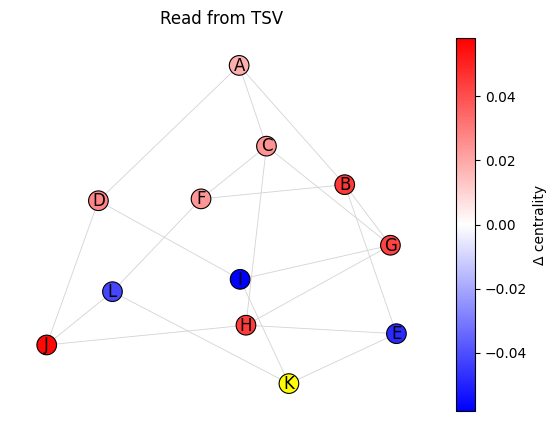

,new,diff
A,0.083333,0.018182
B,0.155556,0.044949
C,0.111111,0.024747
D,0.101852,0.027609
E,0.016667,-0.048485
F,0.098148,0.023906
G,0.135185,0.042761
H,0.151852,0.044276
I,0.022222,-0.058081
J,0.133333,0.056061


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

from read_file import read_file
from node_removal_graph_analyser import get_node_removal_impact, centrality_functions
from graph_plot import plot_result

# INPUT
# config file read
COL_EDGE1 = "edge1"
COL_EDGE2 = "edge2"
COL_WEIGHT = "weight"
GRAPH_PATH = "../../assets/graph.tsv"
# nodes to remove
REMOVED_NODES = ['K']
# centralities to analyse
ANALYSED_CENTRALITIES = ['betweenness']

# step 1 - read file
G = read_file(COL_EDGE1, COL_EDGE2, COL_WEIGHT, GRAPH_PATH)

# step 2 - analyse and accumulate centrality score and centrality delta
overall_centrality_delta = {}
overall_centrality_score = {}
# iterate over provided centralities
for centrality in ANALYSED_CENTRALITIES:
    _, node_removal_impact, new_centrality = get_node_removal_impact(
        G, REMOVED_NODES, centrality_functions[centrality]
    )

    # accumulate deltas
    for k, v in node_removal_impact.items():
        overall_centrality_delta[k] = overall_centrality_delta.get(k, 0) + v

    # accumulate new centrality scores
    for k, v in new_centrality.items():
        overall_centrality_score[k] = overall_centrality_score.get(k, 0) + v

# step 3 - plot the result
result = {
    "label": "Read from TSV",
    "gtype": "Read from TSV",
    "impact": overall_centrality_delta,
    "graph": G,
    "removed_nodes": REMOVED_NODES,
}

plot_result(result, {}, save_plots=False, showLabels=True)

# step 4 - build final table using the accumulated results
centrality_table = {}
for node in overall_centrality_score:
    new_val = overall_centrality_score[node]
    diff = overall_centrality_delta.get(node, np.nan)

    centrality_table[node] = {
        "new": new_val,
        "diff": diff
    }

df = pd.DataFrame.from_dict(centrality_table, orient="index")

# evaluate the df
df
